## Setup and get data

In [173]:
import pandas as pd
import numpy as np 

train_data = pd.read_csv("../titanic/titanic_data/train.csv")
test_data = pd.read_csv("../titanic/titanic_data/test.csv")
print("setup finished")

setup finished


In [174]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [172]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data exploring

### General data exploring

In [4]:
'''
SibSp - siblings and spouse
Parch - parents and children
'''
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# data columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
len(train_data.Cabin.unique())

148

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# percentage of missing data
train_data.isnull().sum() / train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Explore name column and title 

In [190]:
#Iterate through Names and accumulate new type of titles in indx_other.append(i).
#Createing a new cat. or merging to existant

indx_Mr = []
indx_Mrs = []
indx_Miss = []
indx_Mstr = []
indx_Mjr = []
indx_Rev = []
indx_Dr = []
indx_Ms = []
indx_Col = []

# 'Dona' is equal to Mrs, in test_data = no sblsp, no parch, age = 39, 1 line,

indx_other = []

for i,name in enumerate(train_data['Name']):
    if 'Mrs.' in name:
        indx_Mrs.append(i)
    elif 'Dona.' in name:
        indx_Mrs.append(i) 
    elif 'Mme.' in name:
        indx_Mrs.append(i)
    elif 'Lady.' in name:
        indx_Mrs.append(i)         
    elif 'Mr.' in name:
        indx_Mr.append(i)
    elif 'Sir.' in name:
        indx_Mr.append(i)
    elif 'Don.' in name:
        indx_Mr.append(i)        
    elif 'Jonkheer.' in name:
        indx_Mr.append(i) 
    elif 'Master.' in name:
        indx_Mstr.append(i)
    elif 'Miss.' in name:
        indx_Miss.append(i) 
    elif 'Mlle.' in name:
        indx_Miss.append(i)
    elif 'Rev.' in name:
        indx_Rev.append(i)
    elif 'Dr.' in name:
        indx_Dr.append(i)        
    elif 'Major.' in name:
        indx_Mjr.append(i) 
    elif 'Col.' in name:
        indx_Col.append(i)
    elif 'Capt.' in name:
        indx_Col.append(i)
    elif 'Ms.' in name:
        indx_Ms.append(i)        
    else:
        indx_other.append(i)

In [191]:
other_names = train_data.iloc[indx_other]

In [161]:
other_names_test = test_data.iloc[indx_other]

In [200]:
Miss = train_data.iloc[indx_Dr]
#Mrs = train_data.iloc[indx_Mrs]
Miss.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,7.000000,7.000000,7.000000,6.000000,7.000000,7.0,7.000000
mean,545.857143,0.428571,1.285714,42.000000,0.571429,0.0,49.168457
std,222.196931,0.534522,0.487950,12.016655,0.975900,0.0,45.673745
min,246.000000,0.000000,1.000000,23.000000,0.000000,0.0,10.500000
25%,358.500000,0.000000,1.000000,35.000000,0.000000,0.0,19.964600
50%,633.000000,0.000000,1.000000,46.500000,0.000000,0.0,30.500000
75%,714.000000,1.000000,1.500000,49.750000,1.000000,0.0,64.800000
max,797.000000,1.000000,2.000000,54.000000,2.000000,0.0,133.650000


### Explore survival rate among features with nan values

#### nan cabin

In [175]:
nancabin_passengers = train_data.loc[train_data.Cabin.isnull()]

In [176]:
nancabin_passengers.Survived.value_counts()

0    481
1    206
Name: Survived, dtype: int64

aha. wec can see that around 70% of nan cabin passengers had not survived. could be additional criteria.  We will create a binary feature "nan_cabin" which tells the model about that fact

In [181]:
# Just want to check in nan cabin passengers had specific tickets
ticket_nancabin = nancabin_passengers.Ticket

In [183]:
print(ticket_nancabin)

0             A/5 21171
2      STON/O2. 3101282
4                373450
5                330877
7                349909
             ...       
884     SOTON/OQ 392076
885              382652
886              211536
888          W./C. 6607
890              370376
Name: Ticket, Length: 687, dtype: object


no specific tickets for that group

#### nan Age

In [177]:
nanage_passengers = train_data.loc[train_data.Age.isnull()]

In [179]:
nanage_passengers.Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

aha. wec can see that more than 60% of nan Age passengers had not survived. could be additional criteria.  We will create a binary feature "nanage" which tells the model about that fact

### Explore ticket

In [47]:
train_data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '36973', '347088', 'PC 17605', '2661', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./C

## Data Preprocessing and feature generation

### Exrtract name title

In [185]:

# add Title column
#sLength = len(X_train['Name'])
#X_train = X_train.assign(Title = pd.Series(np.random.randn(sLength)).values)


#fill Title column according to Names
def fill_title(df):
    title = []
    ind = []
    for index, row in df.iterrows():
        name = row['Name']
        start = name.find(', ') + 2
        end = name.find('.', start)
        sub_name = name[start:end]
        if sub_name in ['Dona', 'Mme', 'Lady', 'the Countess']:
            sub_name = 'Mrs'
        if sub_name in ['Sir', 'Don', 'Jonkheer']:
            sub_name = 'Mr'
        if sub_name in ['Capt']:
            sub_name = 'Col'
        if sub_name in ['Mlle']:
            sub_name = 'Miss'
    
        title.append(sub_name)
        ind.append(index)
       
    return pd.Series(title, index = ind, name = 'Title')



### Fill missing Age values based on title

In [186]:
# a function to replace Nan Age values with mean from pre-calculated table
def fill_age (df, mean_table):
    
    df['Age'] = df.apply(
    lambda row: mean_table[row['Title']] if np.isnan(row['Age']) else row['Age'],
    axis=1
    )    
    return df


In [187]:
#create separated title column and loc columns for Age calc
train_data_title_column = fill_title(train_data)
train_data_age_columns = train_data.loc[:,['Age','SibSp','Parch']]
train_data_age_fill = train_data_age_columns.join(train_data_title_column)
train_data_age_fill.head()

,Age,SibSp,Parch,Title
0,22.0,1,0,Mr
1,38.0,1,0,Mrs
2,26.0,0,0,Miss
3,35.0,1,0,Mrs
4,35.0,0,0,Mr


In [188]:
mean_age_by_title = train_data_age_fill.groupby(['Title']).mean().loc[:,'Age']
print(mean_age_by_title)

Title
Col       62.000000
Dr        42.000000
Major     48.500000
Master     4.574167
Miss      21.804054
Mr        32.442643
Mrs       35.873874
Ms        28.000000
Rev       43.166667
Name: Age, dtype: float64


In [194]:
#Also usefull to evaluate the variance of the age estimate
train_data_age_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   Title   891 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [189]:
#Estimate mean age for missing data.

train_data = train_data.join(train_data_title_column)
train_data = fill_age(train_data,mean_age_by_title)

In [190]:
train_data .head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Define average Fare based on Pclass

In [44]:
train_average_fare = train_data.groupby(['Pclass']).mean().loc[:,'Fare']
print(train_average_fare)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [47]:
fare_dic = train_average_fare.to_dict()

In [50]:
fare_dic[2]

20.66218315217391

### Create parent attrubute feature

In [184]:
# not finished yet. Just Idea
# a function to create a Parent feature
def fill_parent (df):
    
##fill function 
    return pd.Series(par, index = ind, name = 'Parent')

###  Drop data

In [16]:
#drop some data

#drop nan 'Embarked' rows
inds = train_data['Embarked'].isna()
#inds[inds.values=True].index
#nan_indexes = train_data['Embarked'].index[train_data['Embarked'].apply(np.isnan)]
rows_to_drop = inds.index[inds].tolist()
cols_to_drop = ['Cabin','Name','Ticket','PassengerId']
train_data_clean = train_data.drop(axis=0, index = rows_to_drop)
train_data_clean = train_data_clean.drop(cols_to_drop, axis=1)

In [17]:
train_data_clean.shape

(889, 9)

In [18]:
train_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [149]:
Emb = pd.get_dummies(train_data_clean.Embarked, prefix = 'Emb')
Emb

,Emb_C,Emb_Q,Emb_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


### Split Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics


In [20]:
# Split train data for model validation
X = train_data_clean.drop(['Survived'], axis = 1)
y = train_data_clean['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
364,3,male,32.442643,1,0,15.5000,Q,Mr
256,1,female,35.873874,0,0,79.2000,C,Mrs
477,3,male,29.000000,1,0,7.0458,S,Mr
272,2,female,41.000000,0,1,19.5000,S,Mrs
554,3,female,22.000000,0,0,7.7750,S,Miss
768,3,male,32.442643,1,0,24.1500,Q,Mr
232,2,male,59.000000,0,0,13.5000,S,Mr
536,1,male,45.000000,0,0,26.5500,S,Major
163,3,male,17.000000,0,0,8.6625,S,Mr
659,1,male,58.000000,0,2,113.2750,C,Mr


In [22]:
y_train.head()

364    0
256    1
477    0
272    1
554    1
Name: Survived, dtype: int64

### Categorical variables encoding

In [23]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
#object_cols1 = ['Cabin'] 


print("Categorical variables:", object_cols )
#print(object_cols)

Categorical variables: ['Sex', 'Embarked', 'Title']


In [126]:
feature

'Title'

In [25]:
# Label encoding for categorical features
X_train_label = X_train.copy()
X_val_label = X_val.copy()

for feature in object_cols:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(X_train[feature])
    labeled_train = label_encoder.transform(X_train[feature])  
    labeled_val = label_encoder.transform(X_val[feature])
    X_train_label[feature + '_label'] = labeled_train 
    X_val_label[feature + '_label'] = labeled_val


In [26]:
X_train_label.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_label,Embarked_label,Title_label
364,3,male,32.442643,1,0,15.5000,Q,Mr,1,1,5
256,1,female,35.873874,0,0,79.2000,C,Mrs,0,0,6
477,3,male,29.000000,1,0,7.0458,S,Mr,1,2,5
272,2,female,41.000000,0,1,19.5000,S,Mrs,0,2,6
554,3,female,22.000000,0,0,7.7750,S,Miss,0,2,4


## Feature Selection

In [64]:
Train_df = X_train_label.join(y_train)
Train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_label,Embarked_label,Title_label,Survived
364,3,male,32.442643,1,0,15.5000,Q,Mr,1,1,5,0
256,1,female,35.873874,0,0,79.2000,C,Mrs,0,0,6,1
477,3,male,29.000000,1,0,7.0458,S,Mr,1,2,5,0
272,2,female,41.000000,0,1,19.5000,S,Mrs,0,2,6,1
554,3,female,22.000000,0,0,7.7750,S,Miss,0,2,4,1


In [ ]:
#need to build some charts
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Explore Age distribution and age importance

<AxesSubplot:>

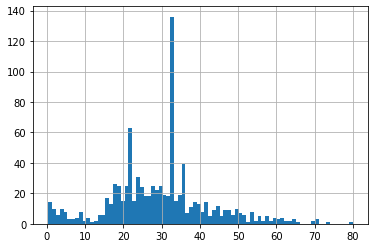

In [34]:
#build hitrogram of Age
train_data.Age.hist(bins = 80)

In [41]:
# look at Age in Asc order
Age_Surv = train_data.loc[:,['Age','Survived']]
Age_Surv_sort = Age_Surv.sort_values(by = ['Age'])
Age_Surv_sort.tail()

,Age,Survived
116,70.5,0
493,71.0,0
96,71.0,0
851,74.0,0
630,80.0,1


In [48]:
Age_Surv_sort.Age = Age_Surv_sort.Age.round()

In [71]:
#a share of suvival in the Age group
Age_groups = Age_Surv_sort.groupby(['Age'])['Survived'].sum()/Age_Surv_sort.groupby(['Age'])['Survived'].count()
type(Age_groups)

pandas.core.series.Series

<AxesSubplot:xlabel='Age', ylabel='Survived'>

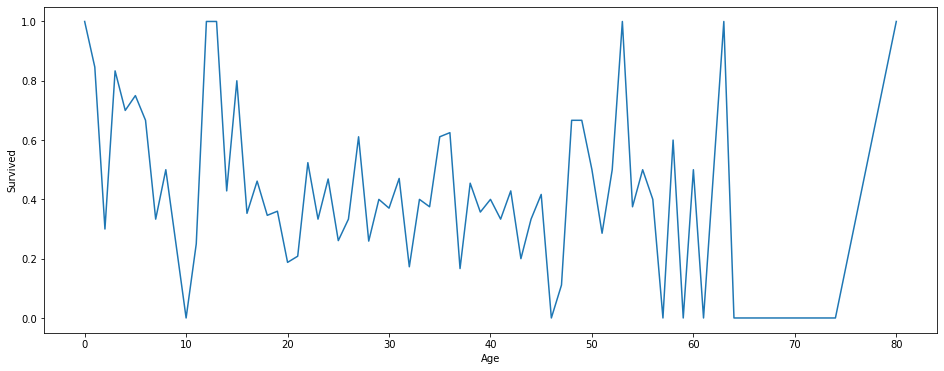

In [57]:
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=Age_groups)

### Selection of others

In [74]:
Emb_Surv = Train_df.loc[:,['Embarked_label','Survived']]
Emb_groups = Emb_Surv.groupby(['Embarked_label'])['Survived'].sum()
Emb_groups

Embarked_label
0     75
1     27
2    165
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked_label', ylabel='Survived'>

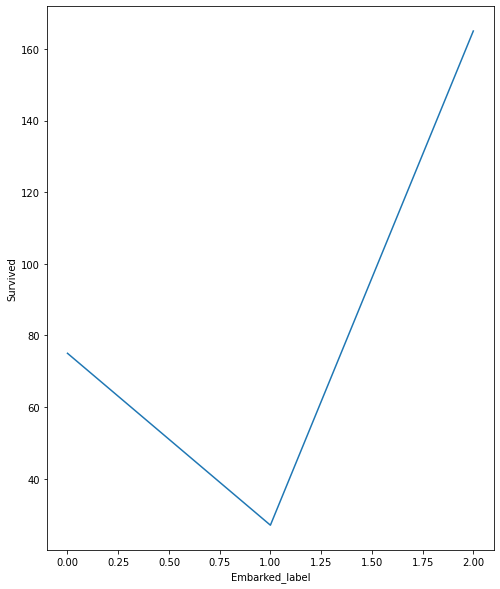

In [78]:
plt.figure(figsize=(8,10))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data = Emb_groups)

### Select K best

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

#test_data.head()

'''
SibSp - siblings and spouse
Parch - parents and children
'''

feature_cols = ['Pclass','Sex_label','Embarked_label','Title_label','Age','Fare','SibSp','Parch']
# Keep 5 features
selector = SelectKBest(f_classif, k=4)

X_new = selector.fit_transform(X_train_label[feature_cols], y_train)
X_new

array([[ 3.    ,  1.    ,  1.    , 15.5   ],
       [ 1.    ,  0.    ,  0.    , 79.2   ],
       [ 3.    ,  1.    ,  2.    ,  7.0458],
       ...,
       [ 1.    ,  1.    ,  2.    , 30.    ],
       [ 3.    ,  1.    ,  1.    ,  7.75  ],
       [ 2.    ,  1.    ,  0.    , 41.5792]])

In [25]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=X_train_label.index, 
                                 columns=feature_cols)
selected_features.head()

,Pclass,Sex_label,Embarked_label,Title_label,Age,Fare,SibSp,Parch
364,3.0,1.0,1.0,0.0,0.0,15.5000,0.0,0.0
256,1.0,0.0,0.0,0.0,0.0,79.2000,0.0,0.0
477,3.0,1.0,2.0,0.0,0.0,7.0458,0.0,0.0
272,2.0,0.0,2.0,0.0,0.0,19.5000,0.0,0.0
554,3.0,0.0,2.0,0.0,0.0,7.7750,0.0,0.0


## Model training

In [158]:
feature_cols = ['Pclass','Sex_label','Embarked_label','Title_label','Age','Fare','SibSp','Parch']
feature_cols_2 = ['Pclass','Sex_label','Embarked_label','Title_label','Age','Fare']
fearure_cols_3 = ['Sex_label']

### LightGBM model train

In [21]:
import lightgbm as lgb



dtrain = lgb.Dataset(X_train_label[feature_cols], label=y_train)
dvalid = lgb.Dataset(X_val_label[feature_cols], label=y_val)

param = {'num_leaves': 64, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)


[LightGBM] [Info] Number of positive: 267, number of negative: 444
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

### XGBoost model

In [151]:
from xgboost import XGBClassifier

In [159]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train_label[feature_cols_3], y_train)

NameError: name 'feature_cols_3' is not defined

In [153]:
y_pred = XGB_model.predict(X_val_label[feature_cols_2])

In [157]:
y_pred_ = XGB_model.predict_proba(X_val_label[feature_cols_2])
y_pred_

array([[1.03409350e-01, 8.96590650e-01],
       [7.02598095e-01, 2.97401905e-01],
       [3.27110291e-04, 9.99672890e-01],
       [1.57726407e-01, 8.42273593e-01],
       [9.95955765e-01, 4.04423848e-03],
       [7.12029219e-01, 2.87970811e-01],
       [8.72687161e-01, 1.27312854e-01],
       [1.17996693e-01, 8.82003307e-01],
       [1.63463593e-01, 8.36536407e-01],
       [3.99133086e-01, 6.00866914e-01],
       [7.95371175e-01, 2.04628810e-01],
       [4.69803810e-04, 9.99530196e-01],
       [5.15037775e-02, 9.48496222e-01],
       [9.80623960e-01, 1.93760339e-02],
       [1.46029413e-01, 8.53970587e-01],
       [9.89244878e-01, 1.07551385e-02],
       [6.53564930e-04, 9.99346435e-01],
       [9.77607429e-01, 2.23925933e-02],
       [7.63679564e-01, 2.36320436e-01],
       [1.24373436e-02, 9.87562656e-01],
       [7.50908375e-01, 2.49091595e-01],
       [7.89064169e-03, 9.92109358e-01],
       [2.99387455e-01, 7.00612545e-01],
       [9.97198939e-01, 2.80103344e-03],
       [9.354105

In [154]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1], dtype=int64)

In [155]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[89, 16],
       [24, 49]], dtype=int64)

In [156]:
print("Mean Absolute Error: " + str(mean_absolute_error(y_pred, y_val)))

Mean Absolute Error: 0.2247191011235955


### Make predictions

In [ ]:
from sklearn import metrics
ypred = bst.predict(test[feature_cols])
score = metrics.roc_auc_score(test['outcome'], ypred)

## Get result on test dataset

Plan:
1. Overview and recap
2. Fill missing
3. Drop data and Encoding
4. Select feature vector and learn
5. Predict

### General overview of the test_data

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Fill missing test data

#### Fill age

In [28]:
#create separated title column
test_data_title_column = fill_title(test_data)

In [35]:
test_data_title_column.shape

(418,)

In [36]:
#join the title column and fill missing age lines
test_data = test_data.join(test_data_title_column)
test_data = fill_age(test_data, mean_age_by_title)

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


#### Fill Fare
We have 1 missing 'Fare' value  
!!! This code is temporary for unique case of 1 missing value

In [103]:
nofare_lines = test_data.loc[test_data.Fare.isna()]

In [104]:
#bad way to treat df
nofare_lines.Fare = fare_dic[fare_line.Pclass.item()]

C:\Users\mikhe\miniconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [102]:
missing_fare = fare_dic[fare_line.Pclass.item()]
ind = fare_line.index.item()
print('missing_fare: ' +  str(missing_fare) + '  index: ' + str(ind))

missing_fare: 13.675550101832997  index: 152


In [120]:
test_data.at[ind, 'Fare'] = missing_fare

### Drop not usable data and encode variables

#### Drop cols

In [123]:
#drop_not_usable_cols
cols_to_drop = ['Cabin','Name','Ticket','PassengerId']

test_data_clean = test_data.drop(cols_to_drop, axis=1)

In [124]:
test_data_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


#### Encode full train dataset and test data

In [125]:
print("Categorical variables:", object_cols )

Categorical variables: ['Sex', 'Embarked', 'Title']


In [128]:
#copy data to a new df to form data w encoded categorical variables
X_label = X.copy()
test_data_label = test_data_clean.copy()

#iterate through categorical variables
for feature in object_cols:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(X[feature])
    labeled_fulltrain = label_encoder.transform(X[feature])  
    labeled_test = label_encoder.transform(test_data_clean[feature])
    X_label[feature + '_label'] = labeled_fulltrain 
    test_data_label[feature + '_label'] = labeled_test

In [131]:
X_label.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_label,Embarked_label,Title_label
0,3,male,22.0,1,0,7.2500,S,Mr,1,2,5
1,1,female,38.0,1,0,71.2833,C,Mrs,0,0,6
2,3,female,26.0,0,0,7.9250,S,Miss,0,2,4
3,1,female,35.0,1,0,53.1000,S,Mrs,0,2,6
4,3,male,35.0,0,0,8.0500,S,Mr,1,2,5


In [132]:
print(X_label.shape, test_data_label.shape)

(889, 11) (418, 11)


### Learn the model on full train dataset

In [130]:
#select feature vector
feature_cols_v1 = ['Pclass','Sex_label','Embarked_label','Title_label','Age','Fare','SibSp','Parch']

#### XGBoost model

In [135]:
#from xgboost import XGBClassifier - already done
#train
XGB_model_full = XGBClassifier()
XGB_model_full.fit(X_label[feature_cols_v1], y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [139]:
#XGB prediction
y_test_pred = XGB_model_full.predict(test_data_label[feature_cols_v1])

In [141]:
type(y_test_pred)

numpy.ndarray

In [143]:
#save the submission
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_test_pred})
output.to_csv('../titanic/submissions/XGB_submission.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
